<a href="https://colab.research.google.com/github/gstripling00/introduction_to_neural_networks/blob/main/simple_neural_network_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network using Keras


## Introduction 
I created a prediction model for sales analysis. In this model, we need to feed the advertising budget of TV, radio, and newspapers to the model and the model will forecast the possible sales. For designing the model, the machine learning method I opted for is simple linear regression, and the programming was done in Jupyter notebook.

## Dataset
The advertising dataset captures the sales revenue generated with respect to advertisement costs across numerous platforms like radio, TV, and newspapers.

### Features:

#### Digital: advertising dollars spent on Internet.
#### TV: advertising dollars spent on TV.
#### Radio: advertising dollars spent on Radio.
#### Newspaper: advertising dollars spent on Newspaper.

### Target (Label):
#### Sales budget

### Import Libraries

In [2]:
# Importing Pandas, a data processing and CSV file I/O libraries
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib. 
%matplotlib inline   
import sklearn

##Import the libraries
#import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# Keras specific
#import keras


###  Load the Dataset

You will use the [USA housing prices](https://www.kaggle.com/kanths028/usa-housing) dataset found on Kaggle.  The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [3]:
# Next, you read the dataset into a Pandas dataframe.

url = 'https://github.com/gstripling00/introduction_to_neural_networks/blob/Datasets/Advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)

In [4]:
advertising_df.head()

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


In [5]:
# Pandas info() function is used to get a concise summary of the dataframe.
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [7]:
'''====== Data Exploration and Preprocessing ======'''

#shape of dataframe - 1199 rows, five columns
advertising_df.shape

(1199, 5)

Let's check for any null values.

In [8]:
# The isnull() method is used to check and manage NULL values in a data frame.
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
#check there are any NAN values
advertising_df.isnull().values.any()

False

In [10]:
'''=== show the statistics analysis of each attributes ==='''

#descriptive statistics 
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!  

<Axes: >

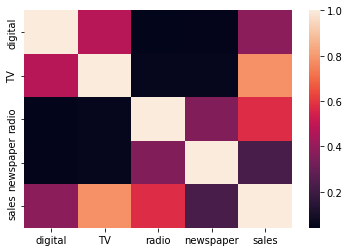

In [11]:
# The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph.
# The goal of the heatmap is to provide a colored visual summary of information.
sns.heatmap(advertising_df.corr()) 

<Axes: >

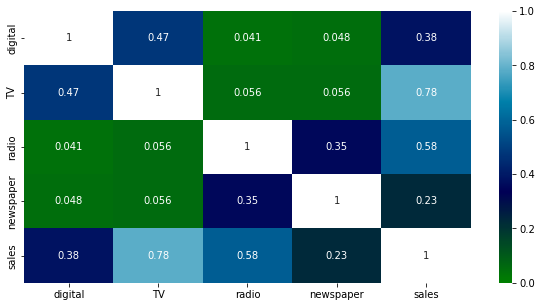

In [12]:
## Another option is to plot the heatmap so that the values are shown.

plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')


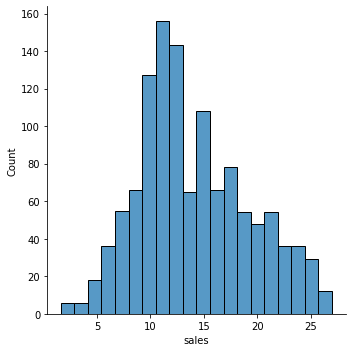

In [13]:
# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence you choose one particular column of the dataset.
sns.displot(advertising_df['sales'])

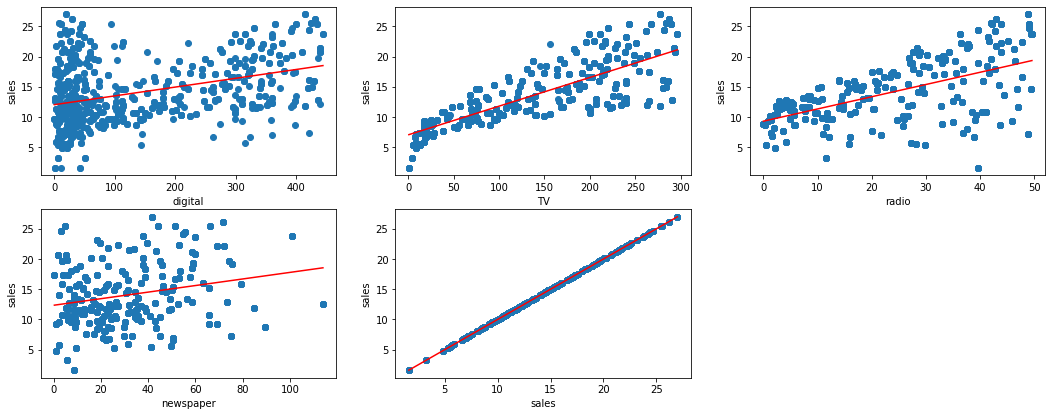

In [14]:
'''=== Show the linear relationship between features  and price. Thus, it provides that how the scattered 
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with sales
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = advertising_df[col] #x-axis
    y = advertising_df['sales'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label
    

## Training a Linear Regression Model

Regression is a supervised machine learning process.  It is similar to classification, but rather than predicting a label, you try to predict a continuous value.   Linear regression defines the relationship between a target variable (y) and a set of predictive features (x).  Simply stated, If you need to predict a number, then use regression. 

Let's now begin to train your regression model! You will need to first split up your data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. You will toss out the Address column because it only has text info that the linear regression model can't use.

### X (features) and y (target) arrays

Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [15]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']

In [16]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(X.values)
print(normalized_feature)

[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


## Train - Test - Split

Now let's split the data into a training, validation, and test set XXXXXXXXx



In [17]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

Now, we need to output the split files. We will specifically need the test.csv later for testing. You should see the files appear in the home directory under sample data.

In [15]:
X_train.to_csv('/content/sample_data/adv-train.csv', encoding='utf-8', index=False)

In [16]:
X_test.to_csv('/content/sample_data/adv-test.csv', encoding='utf-8', index=False)

# Building our network
Because so few samples are available, we will be using a very small network with two hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.

In [17]:
## Build the model
model = Sequential()
model.add(Dense(4,activation='relu')) 
model.add(Dense(3,activation='relu'))
model.add(Dense(1))


## Compile the Model Compilation - Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments
# for a mean squared error regression problem

#model.compile(loss= "mean_squared_error" , 
              #optimizer="adam", 
              #metrics=["mean_squared_error"])

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
#model.summary()

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 32
)

Epoch 1/32
23/23 [==============================] - 2s 22ms/step - loss: 8689.5332 - mae: 80.4131 - val_loss: 6973.6406 - val_mae: 71.6802
Epoch 2/32
23/23 [==============================] - 0s 10ms/step - loss: 5374.7212 - mae: 62.7023 - val_loss: 4355.5361 - val_mae: 56.2837
Epoch 3/32
23/23 [==============================] - 0s 9ms/step - loss: 3440.4778 - mae: 49.8962 - val_loss: 2857.0474 - val_mae: 45.3804
Epoch 4/32
23/23 [==============================] - 0s 9ms/step - loss: 2296.4792 - mae: 40.6287 - val_loss: 1952.8998 - val_mae: 37.3711
Epoch 5/32
23/23 [==============================] - 0s 9ms/step - loss: 1590.7534 - mae: 33.7231 - val_loss: 1385.1990 - val_mae: 31.3772
Epoch 6/32
23/23 [==============================] - 0s 11ms/step - loss: 1143.1039 - mae: 28.5177 - val_loss: 1000.2090 - val_mae: 26.5722
Epoch 7/32
23/23 [==============================] - 0s 6ms/step - loss: 837.6332 - mae: 24.3511 - val_loss: 743.7238 - val_mae: 22.8250
Epoch 8/32
23/23 [===============

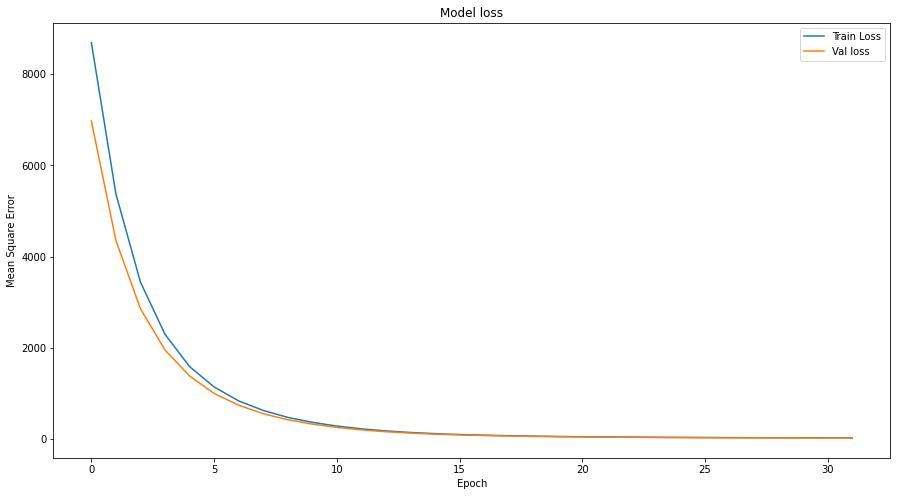

In [18]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

## TALK ABOUT CONVERGENCE

In [19]:
# Use matplotlib to draw the model's loss curves for training and validation
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):  
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left');  

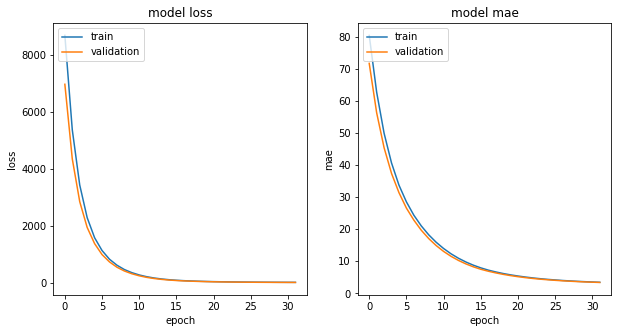

In [20]:
plot_curves(history, ['loss', 'mae'])

In [21]:
'''=== predict the SALES =='''

# predict SALES using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


15/15 [==============================] - 0s 3ms/step
[26.789925  15.049367  20.067823  23.18337   17.776936  31.106901
 13.374514  14.748987  14.123255  12.901587   6.0975666 16.375881
 12.7635    12.641687  14.326943   7.916748  26.191452  14.215786
  7.050012  18.5368    25.697254   5.9589424 12.916978  14.178512
  7.6256037  4.259879  15.849777  14.265251  13.031542   9.915696
 15.92128   10.911242  23.284908  18.120935  31.260395  37.317078
 27.203712  24.621649  12.506098  12.620357  25.25353   10.309524
  7.500252  16.20245   15.933886  10.149846  11.759074  27.203712
 13.106961   8.979227  14.146557  14.326943  12.256336  13.353268
  4.045974  21.245491  16.735012  19.494846  11.913572  13.713219
 12.42844   16.703432  11.567942  15.457317  11.683344  14.210796
 12.417122  23.79809    8.663316  25.12542    5.6815877 16.078566
  7.794796  16.638126  23.595818  15.273891  19.354053  13.057198
 10.911242  25.485262  14.78573   22.347694  15.051347  16.787441
 14.434624  25.726326  

In [22]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,26.2,26.789925
1,19.0,15.049367
2,12.8,20.067823
3,20.8,23.183371
4,16.9,17.776936
5,23.8,31.106901
6,9.3,13.374514
7,22.6,14.748987
8,18.9,14.123255
9,14.9,12.901587


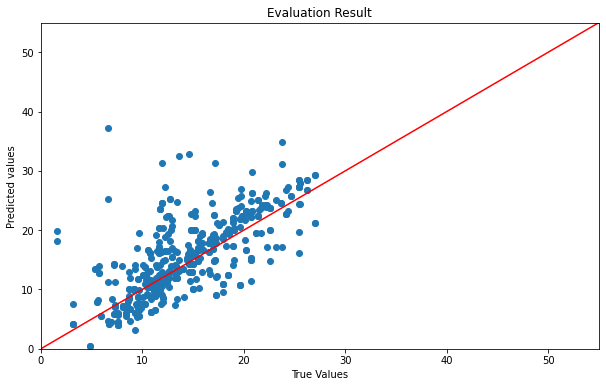

In [23]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

<Axes: xlabel='sales'>

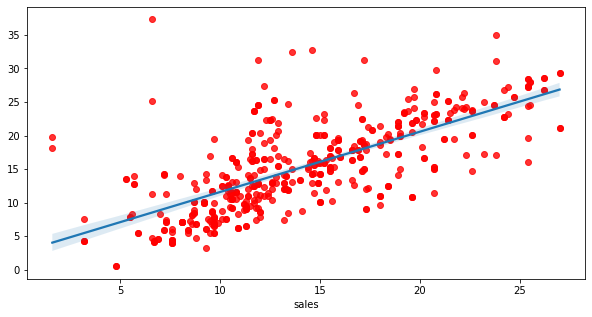

In [24]:
#Accuracy of linear regression on the dataset


plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=test_predictions,scatter_kws={'color':'red'})

In [25]:
# Importing metrics from sklearn
from sklearn import metrics

# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

MAE: 3.396790623615186
MSE: 23.44423075034723
RMSE: 4.841924281765178


In [26]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])

15/15 [==============================] - 0s 3ms/step - loss: 23.4442 - mae: 3.3968
loss value:  23.444231033325195
Mean absolute error:  3.3967905044555664


In [27]:
'''=== predict the SALES =='''

# predict SALES using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


15/15 [==============================] - 0s 2ms/step
[26.789925  15.049367  20.067823  23.18337   17.776936  31.106901
 13.374514  14.748987  14.123255  12.901587   6.0975666 16.375881
 12.7635    12.641687  14.326943   7.916748  26.191452  14.215786
  7.050012  18.5368    25.697254   5.9589424 12.916978  14.178512
  7.6256037  4.259879  15.849777  14.265251  13.031542   9.915696
 15.92128   10.911242  23.284908  18.120935  31.260395  37.317078
 27.203712  24.621649  12.506098  12.620357  25.25353   10.309524
  7.500252  16.20245   15.933886  10.149846  11.759074  27.203712
 13.106961   8.979227  14.146557  14.326943  12.256336  13.353268
  4.045974  21.245491  16.735012  19.494846  11.913572  13.713219
 12.42844   16.703432  11.567942  15.457317  11.683344  14.210796
 12.417122  23.79809    8.663316  25.12542    5.6815877 16.078566
  7.794796  16.638126  23.595818  15.273891  19.354053  13.057198
 10.911242  25.485262  14.78573   22.347694  15.051347  16.787441
 14.434624  25.726326  

In [28]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,26.2,26.789925
1,19.0,15.049367
2,12.8,20.067823
3,20.8,23.183371
4,16.9,17.776936
5,23.8,31.106901
6,9.3,13.374514
7,22.6,14.748987
8,18.9,14.123255
9,14.9,12.901587


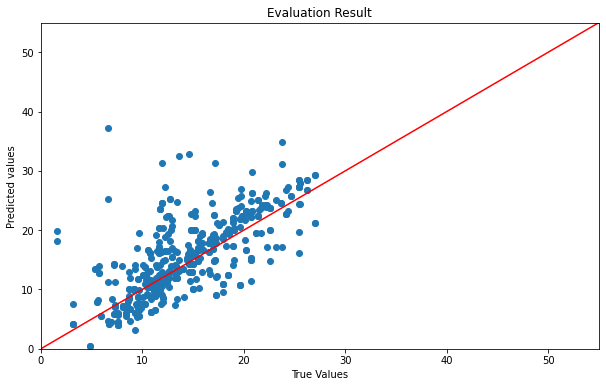

In [29]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()



##Accuracy of linear regression on the dataset

The linear regression graph is created by train data and the model line is shown by the blue line which is created using test data and predicted data as we can see most of the red dots are on the line, thus we can say that model has produced the best-fit line.

<Axes: xlabel='sales'>

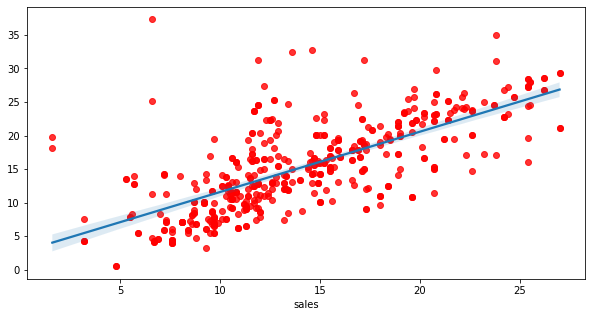

In [30]:
#Accuracy of linear regression on the dataset



plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=test_predictions,scatter_kws={'color':'red'})

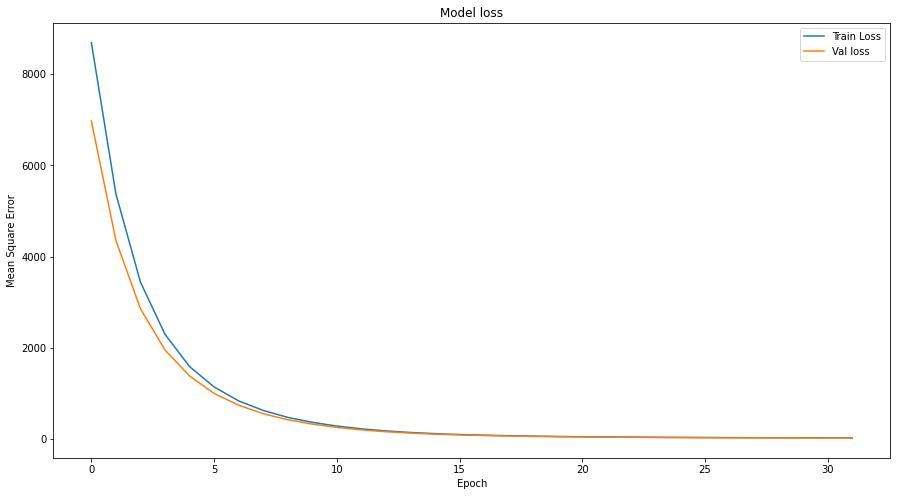

In [31]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

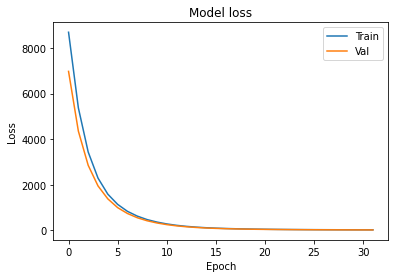

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Explaining above code snippet:

We’ll explain each line of the above code snippet. The first two lines says that we want to plot the loss and the val_loss. The third line specifies the title of this graph, “Model Loss”. The fourth and fifth line tells us what the y and x axis should be labelled respectively. The sixth line includes a legend for our graph, and the location of the legend will be in the upper right. And the seventh line tells Jupyter notebook to display the graph.

# Preparing the data
It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:

Our network ends with a single unit, and no activation (i.e. it will be linear layer). This is a typical setup for scalar regression (i.e. regression where we are trying to predict a single continuous value). Applying an activation function would constrain the range that the output can take; for instance if we applied a sigmoid activation function to our last layer, the network could only learn to predict values between 0 and 1. Here, because the last layer is purely linear, the network is free to learn to predict values in any range.

Note that we are compiling the network with the mse loss function -- Mean Squared Error, the square of the difference between the predictions and the targets, a widely used loss function for regression problems.

We are also monitoring a new metric during training: mae. This stands for Mean Absolute Error. It is simply the absolute value of the difference between the predictions and the targets. For instance, a MAE of 0.5 on this problem would mean that our predictions are off by $500 on average.

# Best Pracices

Wrapping up
Here's what you should take away from this example:

Regression is done using different loss functions from classification; Mean Squared Error (MSE) is a commonly used loss function for
regression.

Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally the concept of "accuracy"
does not apply for regression. A common regression metric is Mean Absolute Error (MAE).

When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
When there is little data available, using K-Fold validation is a great way to reliably evaluate a model.
When little training data is available, it is preferable to use a small network with very few hidden layers (typically only one or two),
in order to avoid severe overfitting.

This example concludes our series of three introductory 

his example concludes our series of three introductory practical examples. You are now able to handle common types of problems with vector data input:

Binary (2-class) classification.
Multi-class, single-label classification.
Scalar regression.
In the next chapter, you will acquire a more formal understanding of some of the concepts you have encountered in these first examples, such as data preprocessing, model evaluation, and overfittin

In [ ]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

In [ ]:
# Importing metrics from sklearn
from sklearn import metrics

# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

In [ ]:
diff = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})

diff.head(5)

In [ ]:
#Note that after 32 Epochs we could have "stopped early" rather than go ghrough 150 eochs since the
#numbers are so close MSE is around $163K.

In [ ]:
## Build the model
model = Sequential()
model.add(Dense(32, input_dim=4, activation= "relu"))
model.add(Dense(32, activation= "relu"))
model.add(Dense(1, activation='linear', name='sales'))


## Compile the Model
model.compile(loss= "mean_squared_error" , 
              optimizer="adam", 
              metrics=["mean_squared_error"])


## Fit the Model

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data = (X_test, y_test))

#train model and perform validation test




NOTHING PAST HERE

## Creating and Training the Model

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how you can interpret them.

**Residual Histogram**

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because you want to minimize them.

In [ ]:
# Importing metrics from sklearn
from sklearn import metrics

In [ ]:
# Importing metrics from sklearn
from sklearn import metrics

# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))